In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('laptop_price.csv',encoding='latin-1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [7]:
drop_cols=['laptop_ID','Product','Inches','Weight','ScreenResolution']
df.drop(drop_cols,axis=1,inplace=True)

In [8]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
997,Acer,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4GB,500GB HDD,Intel HD Graphics 505,Windows 10,380.0
542,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1145.0
318,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,980.0


In [9]:
# cat_cols=['TypeName','Company','Cpu','Gpu','OpSys']
df['Ram'] = df['Ram'].apply(lambda x: x.split('G')[0])


In [10]:
df['Ram']=df['Ram'].astype(int)

In [11]:
df['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int32

In [12]:
df['Memory'] = df['Memory'].apply(lambda x: x.split('G')[0])
df['Memory'] = df['Memory'].apply(lambda x: x.split('T')[0])


In [13]:
df['Memory']=df['Memory'].astype(float)

In [14]:
df['Cpu'] = df['Cpu'].apply(lambda x: x.split(' ')[0])
df['Gpu'] = df['Gpu'].apply(lambda x: x.split(' ')[0])

In [15]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,Apple,Ultrabook,Intel,8,128.0,Intel,macOS,1339.69
1,Apple,Ultrabook,Intel,8,128.0,Intel,macOS,898.94
2,HP,Notebook,Intel,8,256.0,Intel,No OS,575.00
3,Apple,Ultrabook,Intel,16,512.0,AMD,macOS,2537.45
4,Apple,Ultrabook,Intel,8,256.0,Intel,macOS,1803.60


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   float64
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Price_euros  1303 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 76.5+ KB


In [17]:
df.describe(include='all')

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
count,1303,1303,1303,1303.000000,1303.000000,1303,1303,1303.000000
unique,19,6,3,NaN,NaN,4,9,NaN
top,Dell,Notebook,Intel,NaN,NaN,Intel,Windows 10,NaN
freq,297,727,1240,NaN,NaN,722,1072,NaN
mean,NaN,NaN,NaN,8.382195,226.408289,NaN,NaN,1123.686992
std,NaN,NaN,NaN,5.084665,174.609551,NaN,NaN,699.009043
min,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,174.000000
25%,NaN,NaN,NaN,4.000000,64.000000,NaN,NaN,599.000000
50%,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,977.000000
75%,NaN,NaN,NaN,8.000000,256.000000,NaN,NaN,1487.880000


In [18]:
print(df['Gpu'].unique())
print(df['Cpu'].unique())

['Intel' 'AMD' 'Nvidia' 'ARM']
['Intel' 'AMD' 'Samsung']


In [19]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [20]:
df['OpSys'] = df['OpSys'].apply(lambda x: x.split(' ')[0])

In [21]:
df['OpSys'].unique()

array(['macOS', 'No', 'Windows', 'Mac', 'Linux', 'Android', 'Chrome'],
      dtype=object)

In [22]:
def op(o):
    if o == 'macOS' or o=='Mac':
        return 'Mac'
    elif o == 'Windows':
        return 'Windows'
    else:
        return 'other'

In [23]:
df['OpSys']= df['OpSys'].apply(op)

In [24]:
df['OpSys'].unique()

array(['Mac', 'other', 'Windows'], dtype=object)

In [25]:
# I drew other graphs also in other practice file which i don't think makes any sense in incluidng in this.

<AxesSubplot:>

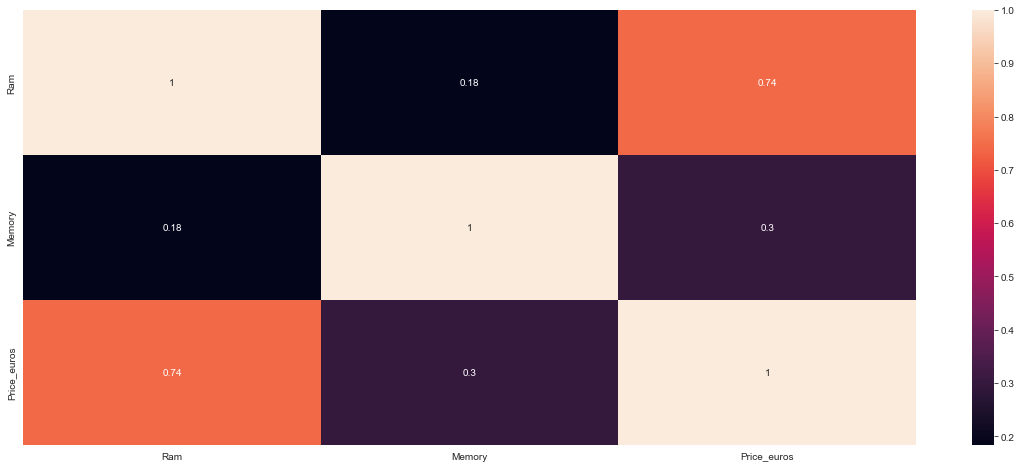

In [26]:
plt.figure(figsize=(20,8))
dfn = df.drop(['Company','TypeName','Gpu','Cpu','OpSys'],axis=1)
sns.heatmap(dfn.corr(),annot=True)

Ram


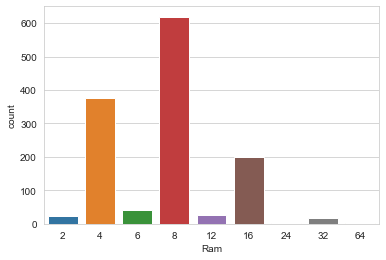

Memory


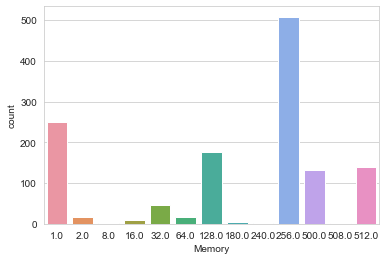

Price_euros


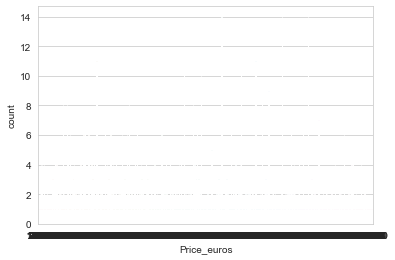

In [43]:
plt.Figure(figsize=(15,3))
def numana(col):
    print(col)
    sns.countplot(data=dfn,x=col)
    plt.show()
for col in dfn.columns:
    numana(col)

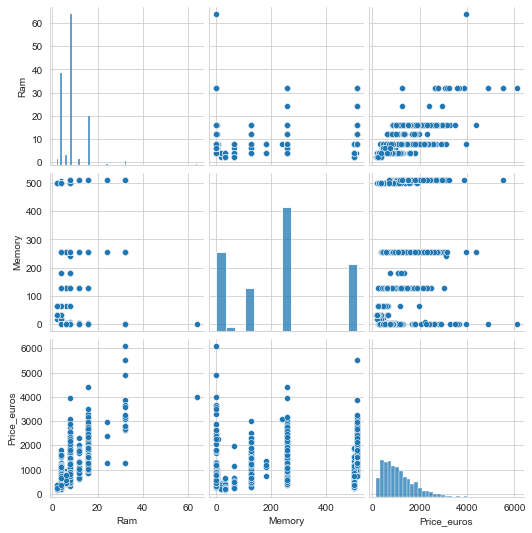

In [27]:
sns.pairplot(dfn)

In [28]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,Apple,Ultrabook,Intel,8,128.0,Intel,Mac,1339.69
1,Apple,Ultrabook,Intel,8,128.0,Intel,Mac,898.94
2,HP,Notebook,Intel,8,256.0,Intel,other,575.00
3,Apple,Ultrabook,Intel,16,512.0,AMD,Mac,2537.45
4,Apple,Ultrabook,Intel,8,256.0,Intel,Mac,1803.60


In [29]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,Apple,Ultrabook,Intel,8,128.0,Intel,Mac,1339.69
1,Apple,Ultrabook,Intel,8,128.0,Intel,Mac,898.94
2,HP,Notebook,Intel,8,256.0,Intel,other,575.00
3,Apple,Ultrabook,Intel,16,512.0,AMD,Mac,2537.45
4,Apple,Ultrabook,Intel,8,256.0,Intel,Mac,1803.60


In [30]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [31]:
def ty(o):
    if o == 'Workstation':
        return 'Workstation'
    else:
        return 'other'
df['TypeName']=df['TypeName'].apply(ty)

In [32]:
df.drop(['Company','Gpu','OpSys'],axis=1,inplace=True)
print(df.columns)
df=pd.get_dummies(df)

Index(['TypeName', 'Cpu', 'Ram', 'Memory', 'Price_euros'], dtype='object')


In [33]:
df = pd.get_dummies(df)
df.head()

,Ram,Memory,Price_euros,TypeName_Workstation,TypeName_other,Cpu_AMD,Cpu_Intel,Cpu_Samsung
0,8,128.0,1339.69,0,1,0,1,0
1,8,128.0,898.94,0,1,0,1,0
2,8,256.0,575.00,0,1,0,1,0
3,16,512.0,2537.45,0,1,0,1,0
4,8,256.0,1803.60,0,1,0,1,0


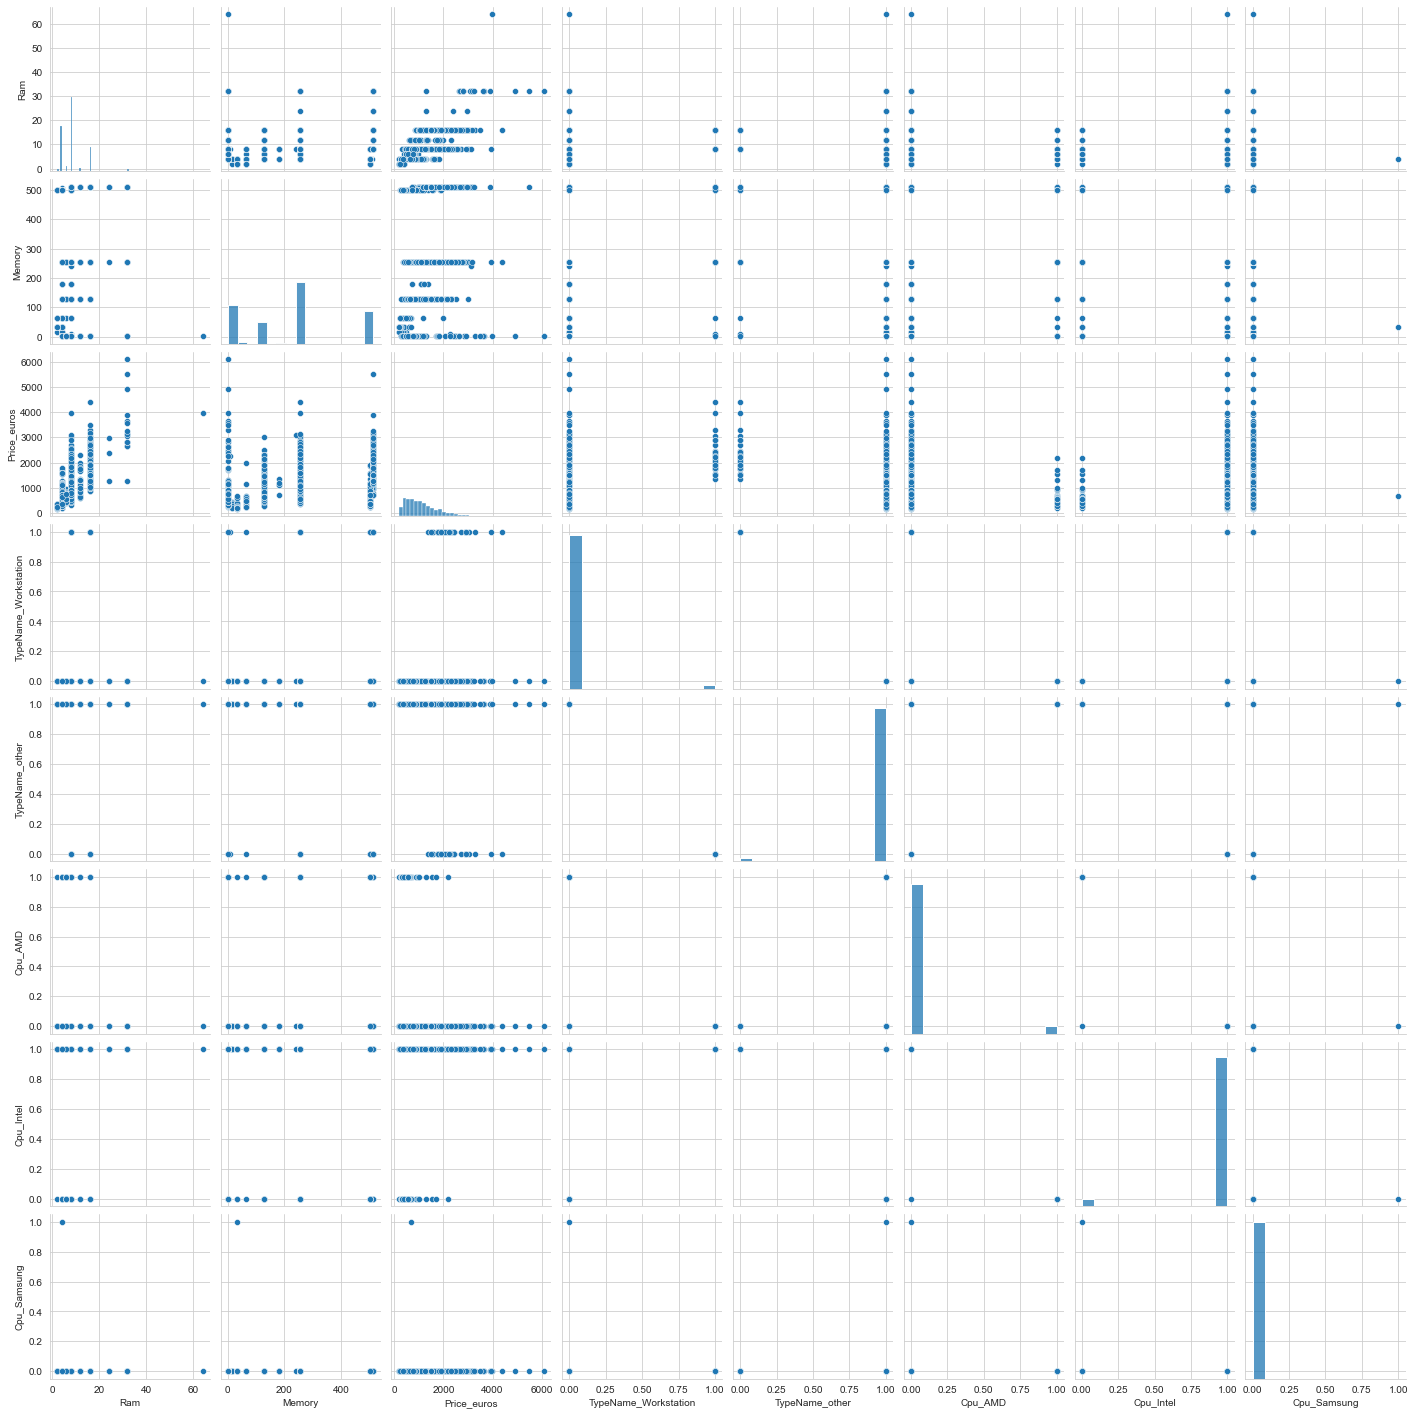

In [44]:
sns.pairplot(df)

In [34]:
target = df['Price_euros']
feats = df.drop(['Price_euros','TypeName_other'],axis=1)

In [35]:
feats.columns

Index(['Ram', 'Memory', 'TypeName_Workstation', 'Cpu_AMD', 'Cpu_Intel',
       'Cpu_Samsung'],
      dtype='object')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

xtrain,xtest,ytrain,ytest = train_test_split(feats,target,test_size=0.25,random_state=20)



In [47]:
model_li = LinearRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeRegressor().fit(xtrain,ytrain)
model_rf = RandomForestRegressor().fit(xtrain,ytrain)

print('Linear T: ',round(model_li.score(xtrain,ytrain)*100,2))
print('Linear E: ',round(model_li.score(xtest,ytest)*100,2))
print('DT T: ',round(model_dt.score(xtrain,ytrain)*100,2))
print('DT E: ',round(model_dt.score(xtest,ytest)*100,2))
print('RF T: ',round(model_rf.score(xtrain,ytrain)*100,2))
print('RF E: ',round(model_rf.score(xtest,ytest)*100))

Linear T:  61.88
Linear E:  61.3
DT T:  70.98
DT E:  69.57
RF T:  70.66
RF E:  70


In [38]:
pd.DataFrame(model_rf.feature_importances_, index=xtrain.columns, columns=['imp']).sort_values(by='imp', ascending=False)

,imp
Ram,0.841761
Memory,0.122142
TypeName_Workstation,0.025190
Cpu_Intel,0.005429
Cpu_AMD,0.005092
Cpu_Samsung,0.000387


In [39]:
pd.to_pickle(model_rf,'laptop.pickle')